# Purpose
The Purpose of this Notebook is to learn how to consolidate categorical features from `immo_data202208_v2.csv` in one column each.

# Summary

| Feature       | Complete Data found in/with | 
| ------------- | --------------------------- |
| Municipality  |  |
| Zip Code      |   | 
| Canton        |     | 
| Street        |  |
| Street Number |  |
| Availability  |  |

In [1]:
# Import modules
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../../../data/immo_data_202208_v2.csv", low_memory=False)


# Address
- `Municipality` (+9126) 
- `address` (=)
- `address_s` (new)
- `location` (+9126)
- `location_parsed` (+9126)
- `Zip` (+9126)
- `plz` (new)
- `plz_parsed` (new)

## Municipality and postal code

In [3]:
cols_plz = ["Zip", "plz", "plz_parsed"]
df_plz = df[cols_plz].copy()

df_plz["from_address"] = df["address"].str.extract(r"(\d{4}) [A-ZÀ-Ÿ]")
df_plz["from_address_s"] = df["address_s"].str.extract("(\d{4}) [A-ZÀ-Ÿ]")
df_plz["from_location"] = df["location"].str.extract("(\d{4}) [A-ZÀ-Ÿ]")
df_plz["from_location_parsed"] = df["location_parsed"].str.extract("plz: ?(\d+)")


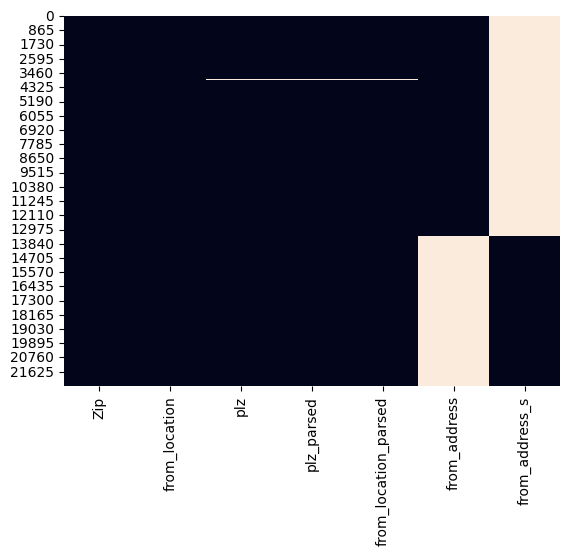

In [4]:
# sort columns by number of non-null values
df_plz = df_plz.reindex(df_plz.count().sort_values(ascending=False).index, axis=1)
# create isna heatmap
sns.heatmap(df_plz.isna(), cbar=False)
plt.show()


In [5]:
df_plz["plz_merged"] = df_plz["from_address"].fillna(df_plz["from_address_s"])
df_plz.drop(columns=["from_address", "from_address_s"], inplace=True)


In [6]:
df_plz[df_plz.isna().any(axis=1)]


,Zip,from_location,plz,plz_parsed,from_location_parsed,plz_merged
3851,8405,4160,NaN,NaN,NaN,4160
4073,8405,7514,NaN,NaN,NaN,7514
4074,8405,7514,NaN,NaN,NaN,7514
4075,8405,7514,NaN,NaN,NaN,7514
4203,8405,7032,NaN,NaN,NaN,7032
4206,8405,7032,NaN,NaN,NaN,7032
4209,8405,7032,NaN,NaN,NaN,7032
4212,8405,7032,NaN,NaN,NaN,7032
10211,8405,1000,NaN,NaN,NaN,1000
10214,8405,1000,NaN,NaN,NaN,1000


In [7]:
df_plz["municipality"] = df["Municipality"].copy()
df_plz["location_parsed"] = df["location_parsed"].copy()
df_plz["address"] = df["address"].copy()
df_plz["location"] = df["location"].copy()


In [8]:
# show lines where plz is not equal to plz_parsed and other plz columns
df_plz[df_plz["plz"].fillna(0) != df_plz["plz_parsed"].fillna(0)]


,Zip,from_location,plz,plz_parsed,from_location_parsed,plz_merged,municipality,location_parsed,address,location
12637,3971,3971,397.0,3971.0,3971,3971,Crans-Montana,Strasse: Rue des écoles 3 plz: 3971 Stadt:Cher...,"Rue des écoles 3, 3971 Chermignon-d'en-Bas Cra...","Rue des écoles 3, 3971 Chermignon-d en-Bas Cra..."
14073,1201,1201,1200.0,1201.0,1201,1201,Genève,"Strasse: Rue de la Cloche 6 , plz:1201 Stadt:...",NaN,"Rue de la Cloche 6, 1201 Genève"
14074,1201,1201,1200.0,1201.0,1201,1201,Genève,"Strasse: Rue de la Cloche 6 , plz:1201 Stadt:...",NaN,"Rue de la Cloche 6, 1201 Genève"
14075,1204,1206,1200.0,1206.0,1206,1206,Genève,Strasse: plz:1206 Stadt: Genève,NaN,1206 Genève
14076,1204,1206,1200.0,1206.0,1206,1206,Genève,Strasse: plz:1206 Stadt: Genève,NaN,1206 Genève
...,...,...,...,...,...,...,...,...,...,...
22318,8044,8044,8000.0,8044.0,8044,8044,Gockhausen,"Strasse: In Grosswiesen 3 , plz:8044 Stadt: ...",NaN,"In Grosswiesen 3, 8044 Gockhausen"
22319,8049,8049,8000.0,8049.0,8049,8049,Zürich,"Strasse: Ferdinand-Hodler-Strasse 44 , plz:80...",NaN,"Ferdinand-Hodler-Strasse 44, 8049 Zürich"
22320,8052,8052,8000.0,8052.0,8052,8052,Zürich,"Strasse: Katzenbachstrasse 219 , plz:8052 Sta...",NaN,"Katzenbachstrasse 219, 8052 Zürich"
22321,8052,8052,8000.0,8052.0,8052,8052,Zürich,"Strasse: Hegnauweg 15 , plz:8052 Stadt: Zürich",NaN,"Hegnauweg 15, 8052 Zürich"


In the top row we can see that the column `plz` sometimes cuts off the values, so we discard it.

In [9]:
# plz is out
df_plz.drop(columns=["plz"], inplace=True)


In [10]:
df_plz[
    df_plz["from_location"].fillna(0).astype(int)
    != df_plz["from_location_parsed"].fillna(0).astype(int)
]


,Zip,from_location,plz_parsed,from_location_parsed,plz_merged,municipality,location_parsed,address,location
3851,8405,4160,NaN,NaN,4160,Troinex,NaN,SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...,SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...
4073,8405,7514,NaN,NaN,7514,Sils im Engadin/Segl,NaN,"7514 Sils/Segl Maria, GR","7514 Sils/Segl Maria, GR"
4074,8405,7514,NaN,NaN,7514,Sils im Engadin/Segl,NaN,"7514 Sils/Segl Maria, GR","7514 Sils/Segl Maria, GR"
4075,8405,7514,NaN,NaN,7514,Sils im Engadin/Segl,NaN,"7514 Sils/Segl Maria, GR","7514 Sils/Segl Maria, GR"
4203,8405,7032,NaN,NaN,7032,Laax,NaN,"Via Brutg 23, 7032 Laax GR 2, GR","Via Brutg 237032 Laax GR 2, GR"
4206,8405,7032,NaN,NaN,7032,Laax,NaN,"Via Brutg 23, 7032 Laax GR 2, GR","Via Brutg 237032 Laax GR 2, GR"
4209,8405,7032,NaN,NaN,7032,Laax,NaN,"Via Cuolm Liung 30, 7032 Laax GR 2, GR","Via Cuolm Liung 307032 Laax GR 2, GR"
4212,8405,7032,NaN,NaN,7032,Laax,NaN,"7032 Laax GR 2, GR","7032 Laax GR 2, GR"
10211,8405,1000,NaN,NaN,1000,Lausanne,NaN,"1000 Lausanne 26, VD","1000 Lausanne 26, VD"
10214,8405,1000,NaN,NaN,1000,Lausanne,NaN,"1000 Lausanne 26, VD","1000 Lausanne 26, VD"


As in the previous version we see that `location_parsed` has some issues and by extension `from_location_parsed`, which is why we drop it again.

In [11]:
df_plz.drop(columns=["location_parsed", "from_location_parsed"], inplace=True)


In [12]:
df_plz[
    df_plz["from_location"].fillna(0).astype(int)
    != df_plz["plz_parsed"].fillna(0).astype(int)
]


,Zip,from_location,plz_parsed,plz_merged,municipality,address,location
3851,8405,4160,NaN,4160,Troinex,SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...,SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...
4073,8405,7514,NaN,7514,Sils im Engadin/Segl,"7514 Sils/Segl Maria, GR","7514 Sils/Segl Maria, GR"
4074,8405,7514,NaN,7514,Sils im Engadin/Segl,"7514 Sils/Segl Maria, GR","7514 Sils/Segl Maria, GR"
4075,8405,7514,NaN,7514,Sils im Engadin/Segl,"7514 Sils/Segl Maria, GR","7514 Sils/Segl Maria, GR"
4203,8405,7032,NaN,7032,Laax,"Via Brutg 23, 7032 Laax GR 2, GR","Via Brutg 237032 Laax GR 2, GR"
4206,8405,7032,NaN,7032,Laax,"Via Brutg 23, 7032 Laax GR 2, GR","Via Brutg 237032 Laax GR 2, GR"
4209,8405,7032,NaN,7032,Laax,"Via Cuolm Liung 30, 7032 Laax GR 2, GR","Via Cuolm Liung 307032 Laax GR 2, GR"
4212,8405,7032,NaN,7032,Laax,"7032 Laax GR 2, GR","7032 Laax GR 2, GR"
10211,8405,1000,NaN,1000,Lausanne,"1000 Lausanne 26, VD","1000 Lausanne 26, VD"
10214,8405,1000,NaN,1000,Lausanne,"1000 Lausanne 26, VD","1000 Lausanne 26, VD"


The column `plz_parsed` has missing values where `from_location` and `plz_merged` do not. Also `Zip` seems to fallback to 8405 where `plz_parsed` is missing. 

In [13]:
df_plz[
    df_plz["Zip"].fillna(0).astype(int) != df_plz["plz_parsed"].fillna(0).astype(int)
]


,Zip,from_location,plz_parsed,plz_merged,municipality,address,location
2,5000,5022,5022.0,5022,NaN,"5022 Rombach, AG","5022 Rombach, AG"
7,5000,5004,5004.0,5004,Aarau,"5004 Aarau, AG","5004 Aarau, AG"
10,5000,5004,5004.0,5004,Aarau,"Rütmattstrasse 17, 5004 Aarau, AG","Rütmattstrasse 175004 Aarau, AG"
23,5417,5301,5301.0,5301,Untersiggenthal,"5301 Siggenthal Station, AG","5301 Siggenthal Station, AG"
27,5412,5300,5300.0,5300,Turgi,"5300 Turgi, AG","5300 Turgi, AG"
...,...,...,...,...,...,...,...
22293,6934,6992,6992.0,6992,Bioggio,NaN,6992 Bioggio
22294,6934,6992,6992.0,6992,Vernate,NaN,6992 Vernate
22308,7464,7463,7463.0,7463,Riom,NaN,"PLAZ FRAVESCH, 7463 Riom"
22372,8404,8400,8400.0,8400,Reutlingen,NaN,8400 Reutlingen (Winterthur)


In [14]:
df_plz[
    df_plz["Zip"].fillna(0).astype(int) != df_plz["plz_merged"].fillna(0).astype(int)
]


,Zip,from_location,plz_parsed,plz_merged,municipality,address,location
2,5000,5022,5022.0,5022,NaN,"5022 Rombach, AG","5022 Rombach, AG"
7,5000,5004,5004.0,5004,Aarau,"5004 Aarau, AG","5004 Aarau, AG"
10,5000,5004,5004.0,5004,Aarau,"Rütmattstrasse 17, 5004 Aarau, AG","Rütmattstrasse 175004 Aarau, AG"
23,5417,5301,5301.0,5301,Untersiggenthal,"5301 Siggenthal Station, AG","5301 Siggenthal Station, AG"
27,5412,5300,5300.0,5300,Turgi,"5300 Turgi, AG","5300 Turgi, AG"
...,...,...,...,...,...,...,...
22293,6934,6992,6992.0,6992,Bioggio,NaN,6992 Bioggio
22294,6934,6992,6992.0,6992,Vernate,NaN,6992 Vernate
22308,7464,7463,7463.0,7463,Riom,NaN,"PLAZ FRAVESCH, 7463 Riom"
22372,8404,8400,8400.0,8400,Reutlingen,NaN,8400 Reutlingen (Winterthur)


In [15]:
df_plz[
    df_plz["plz_parsed"].fillna(0).astype(int)
    != df_plz["plz_merged"].fillna(0).astype(int)
]


,Zip,from_location,plz_parsed,plz_merged,municipality,address,location
3851,8405,4160,NaN,4160,Troinex,SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...,SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...
4073,8405,7514,NaN,7514,Sils im Engadin/Segl,"7514 Sils/Segl Maria, GR","7514 Sils/Segl Maria, GR"
4074,8405,7514,NaN,7514,Sils im Engadin/Segl,"7514 Sils/Segl Maria, GR","7514 Sils/Segl Maria, GR"
4075,8405,7514,NaN,7514,Sils im Engadin/Segl,"7514 Sils/Segl Maria, GR","7514 Sils/Segl Maria, GR"
4203,8405,7032,NaN,7032,Laax,"Via Brutg 23, 7032 Laax GR 2, GR","Via Brutg 237032 Laax GR 2, GR"
4206,8405,7032,NaN,7032,Laax,"Via Brutg 23, 7032 Laax GR 2, GR","Via Brutg 237032 Laax GR 2, GR"
4209,8405,7032,NaN,7032,Laax,"Via Cuolm Liung 30, 7032 Laax GR 2, GR","Via Cuolm Liung 307032 Laax GR 2, GR"
4212,8405,7032,NaN,7032,Laax,"7032 Laax GR 2, GR","7032 Laax GR 2, GR"
10211,8405,1000,NaN,1000,Lausanne,"1000 Lausanne 26, VD","1000 Lausanne 26, VD"
10214,8405,1000,NaN,1000,Lausanne,"1000 Lausanne 26, VD","1000 Lausanne 26, VD"


In [16]:
df_plz.drop(columns=["plz_parsed", "Zip"], inplace=True)


In [17]:
df_plz[df_plz["plz_merged"].isna()]


,from_location,plz_merged,municipality,address,location


In [18]:
df_xlsx_plz = pd.read_excel("../../eda/utils/plz.xlsx", sheet_name="Blatt1")


/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [19]:
df_xlsx_plz.drop(
    ["Kanton", "Canton", "Cantone", "Land", "Pays", "Paese"], axis=1, inplace=True
)
df_xlsx_plz.rename(
    columns={
        df_xlsx_plz.columns[0]: "plz",
        df_xlsx_plz.columns[1]: "municipality",
        df_xlsx_plz.columns[2]: "kanton",
    },
    inplace=True,
)


In [20]:
df_plz["plz_merged"] = df_plz["plz_merged"].astype(int)
df_plz["plz_merged"].isin(df_xlsx_plz["plz"]).value_counts()


True     22473
False        8
Name: plz_merged, dtype: int64

In [21]:
df_plz[~df_plz["plz_merged"].isin(df_xlsx_plz["plz"])]


,from_location,plz_merged,municipality,address,location
3851,4160,4160,Troinex,SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...,SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...
16724,1818,1818,Montreux,NaN,1818 Montreux
18066,1919,1919,Martigny,NaN,1919 Martigny
20414,2737,2737,Bévilard,NaN,2737 Bévilard
20415,2737,2737,Bévilard,NaN,2737 Bévilard
20782,3217,3217,Mühlethurnen,NaN,3217 Mühlethurnen
20783,3217,3217,Mühlethurnen,NaN,3217 Mühlethurnen
20920,3364,3364,Seeberg,NaN,"Dorfstrasse 22, 3364 Seeberg"


In [22]:
df_plz.drop(3851, inplace=True)


In [23]:
df_plz[~df_plz["plz_merged"].isin(df_xlsx_plz["plz"])]


,from_location,plz_merged,municipality,address,location
16724,1818,1818,Montreux,NaN,1818 Montreux
18066,1919,1919,Martigny,NaN,1919 Martigny
20414,2737,2737,Bévilard,NaN,2737 Bévilard
20415,2737,2737,Bévilard,NaN,2737 Bévilard
20782,3217,3217,Mühlethurnen,NaN,3217 Mühlethurnen
20783,3217,3217,Mühlethurnen,NaN,3217 Mühlethurnen
20920,3364,3364,Seeberg,NaN,"Dorfstrasse 22, 3364 Seeberg"


post.ch says 
1818 is Montreux La Redoute
1919 is Martigny Groupe Mutuel
2737 is non existent, but it is 2735 (maybe a typo)
3217 should be 3127 (Mühlethurnen)
3364 should be 3365
and then it should be pretty solid

In [32]:
df_plz["municip_from_address"] = df["address"].str.extract(r"\d{4} (.+?),")
df_plz["municip_from_address_s"] = df["address_s"].str.extract(r"\d{4} (.+)$")

df_plz["municip_merged"] = df_plz["municip_from_address"].fillna(
    df_plz["municip_from_address_s"]
)
df_plz.drop(columns=["municip_from_address", "municip_from_address_s"], inplace=True)


In [33]:
df_plz[df_plz["municip_merged"].isna()]


,from_location,plz_merged,municipality,address,location,municip_merged,address_s


In [ ]:
# drop duplicates plz
df_xlsx_plz.drop_duplicates(subset=["plz"], inplace=True)


In [ ]:
# read canton from plz_xlsx
df_plz["canton"] = df_plz["plz_merged"].map(df_xlsx_plz.set_index("plz")["kanton"])


In [34]:
df_plz


,from_location,plz_merged,municipality,address,location,municip_merged,address_s
0,5023,5023,Biberstein,"5023 Biberstein, AG","5023 Biberstein, AG",Biberstein,NaN
1,5023,5023,Biberstein,"Buhldenstrasse 8d, 5023 Biberstein, AG","Buhldenstrasse 8d5023 Biberstein, AG",Biberstein,NaN
2,5022,5022,NaN,"5022 Rombach, AG","5022 Rombach, AG",Rombach,NaN
3,5023,5023,Biberstein,"Buhaldenstrasse 8A, 5023 Biberstein, AG","Buhaldenstrasse 8A5023 Biberstein, AG",Biberstein,NaN
4,5022,5022,Küttigen,"5022 Rombach, AG","5022 Rombach, AG",Rombach,NaN
...,...,...,...,...,...,...,...
22476,9470,9470,Buchs SG,NaN,"Altendorferstrasse 53, 9470 Buchs SG",Buchs SG,"Altendorferstrasse 53, 9470 Buchs SG"
22477,9500,9500,Wil,NaN,"Fürstenlandstrasse 69, 9500 Wil",Wil,"Fürstenlandstrasse 69, 9500 Wil"
22478,9500,9500,Wil SG,NaN,9500 Wil SG,Wil SG,9500 Wil SG
22479,9548,9548,Matzingen,NaN,"Haldenstrasse 30, 9548 Matzingen",Matzingen,"Haldenstrasse 30, 9548 Matzingen"


## Street

In [35]:
df_plz["street"] = df["address"].str.extract(r"(.+), \d{4}")
df_plz["street_s"] = df["address_s"].str.extract(r"(.+), \d{4}")

df_plz["street"] = df_plz["street"].fillna(df_plz["street_s"])
df_plz.loc[df_plz["street"] == "-", "street"] = np.nan
df_plz.loc[df_plz["street"] == "à", "street"] = np.nan

df_plz.drop(columns=["street_s"], inplace=True)

df_plz["street_nr"] = df_plz["street"].str.extract(r"^.+ (\d.+)")
df_plz["street"] = df_plz["street"].str.extract(r"^(.+?) \d")
df_plz["street"] = df_plz["street"].str.rstrip()


In [38]:
df_plz.drop(
    columns=["address", "location", "municipality", "from_location"], inplace=True
)


In [39]:
df_plz


,plz_merged,municip_merged,address_s,street,street_nr
0,5023,Biberstein,NaN,NaN,NaN
1,5023,Biberstein,NaN,Buhldenstrasse,8d
2,5022,Rombach,NaN,NaN,NaN
3,5023,Biberstein,NaN,Buhaldenstrasse,8A
4,5022,Rombach,NaN,NaN,NaN
...,...,...,...,...,...
22476,9470,Buchs SG,"Altendorferstrasse 53, 9470 Buchs SG",Altendorferstrasse,53
22477,9500,Wil,"Fürstenlandstrasse 69, 9500 Wil",Fürstenlandstrasse,69
22478,9500,Wil SG,9500 Wil SG,NaN,NaN
22479,9548,Matzingen,"Haldenstrasse 30, 9548 Matzingen",Haldenstrasse,30


# Availability

Since the availability hasn't changed, we can just process it as before.

In [43]:
availability = df["Availability_merged"].fillna("") + df[
    "detail_responsive#available_from"
].fillna("")
availability = availability.replace("", np.nan)


In [44]:
availability.describe()


count          13355
unique           112
top       On request
freq            9631
dtype: object